Step 1: Import all the packages.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

Step 2: Fetching California housing data.

In [ ]:
housing = fetch_california_housing(as_frame=True)
housing = housing.frame
housing.head()
# print(housing.shape)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Step 3: Visualising the Data.


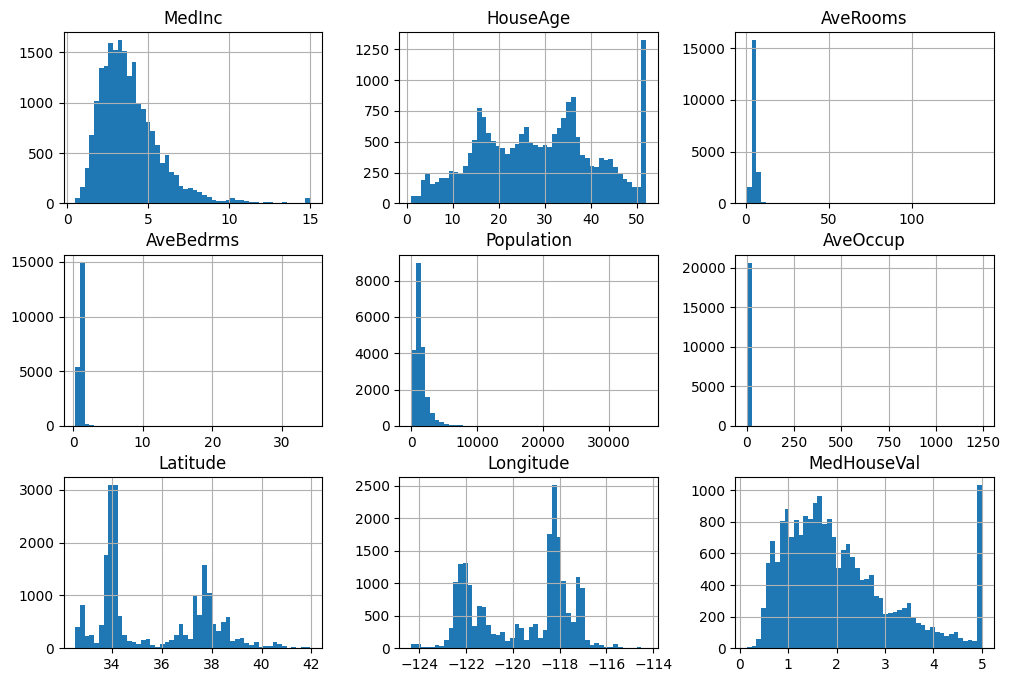

In [ ]:
housing.hist(bins=50, figsize=(12,8))
plt.show()

Plotting the housing value with respect to longitude and latitude i.e based on location.

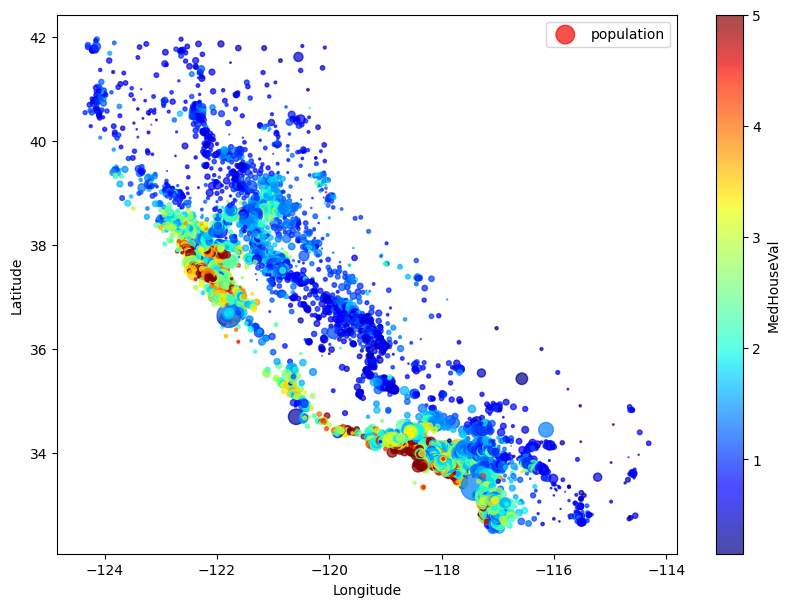

In [ ]:
housing.plot(kind="scatter", x="Longitude",y="Latitude", c="MedHouseVal", cmap="jet", colorbar=True, legend=True, sharex=False, figsize=(10,7), s=housing['Population']/100, label="population", alpha=0.7)
plt.show()

Next, we will plot the correlation between the features against each other.

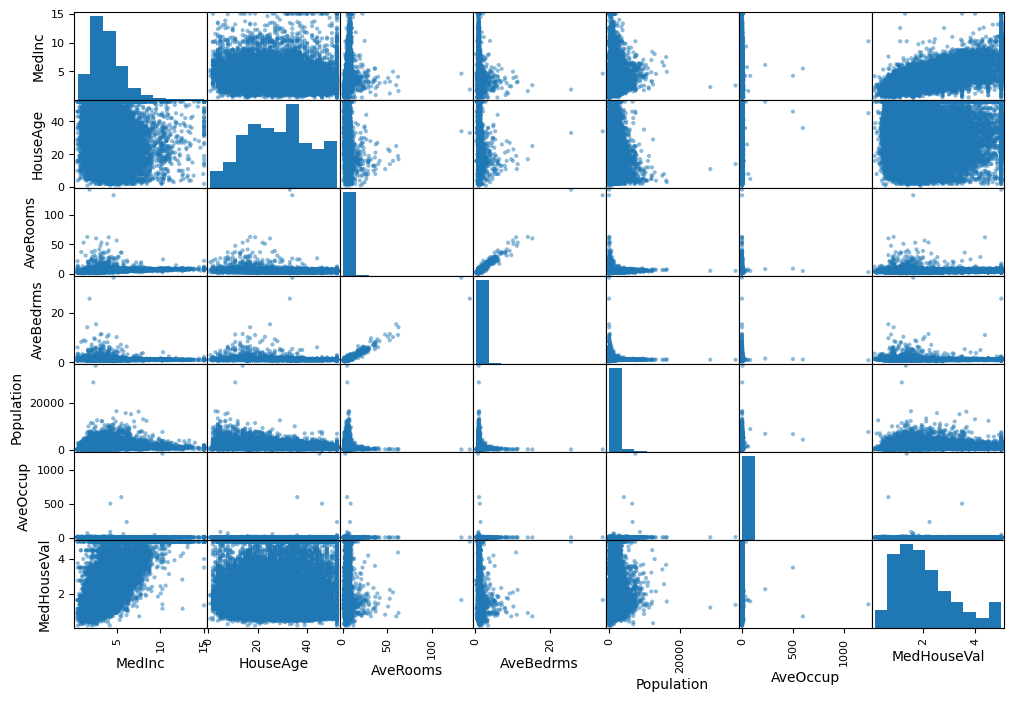

In [ ]:
attributes = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup','MedHouseVal']
scatter_matrix(housing[attributes], figsize=(12,8))
plt.show()

If we check the correlation against MedHouseVal, we can see that all the other features show somewhat weak correlation, except for MedInc (Median Income). Let’s explore further



<Axes: xlabel='MedInc', ylabel='MedHouseVal'>

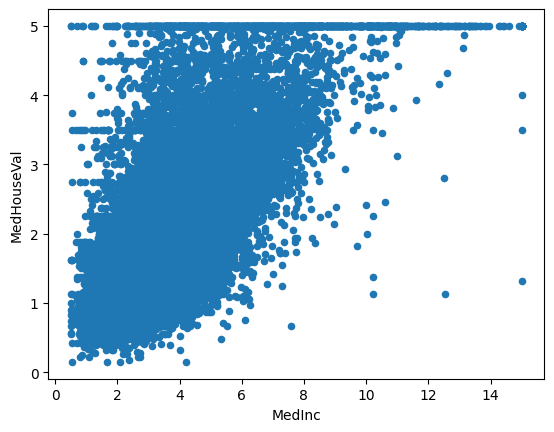

In [ ]:
housing.plot(kind="scatter", x="MedInc",y="MedHouseVal")

Below code display the numerical value of correlation of features against “MedHouseVal”

In [ ]:
corr = housing.corr()
corr['MedHouseVal'].sort_values(ascending=True)

,MedHouseVal
Latitude,-0.144160
AveBedrms,-0.046701
Longitude,-0.045967
Population,-0.024650
AveOccup,-0.023737
HouseAge,0.105623
AveRooms,0.151948
MedInc,0.688075
MedHouseVal,1.000000


We can also see the correlation through a heatmap

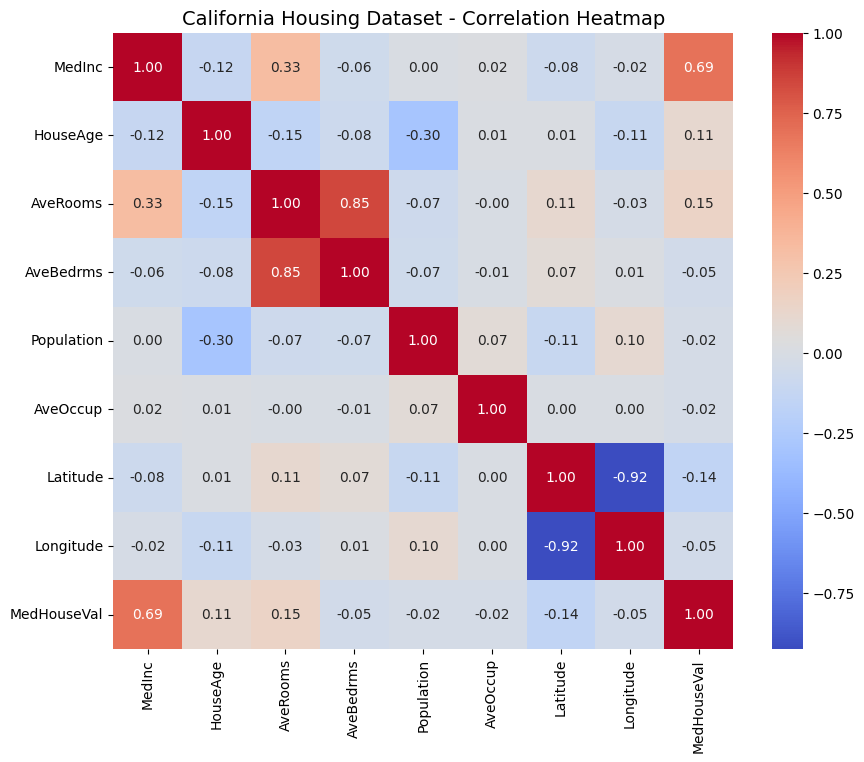

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

plt.title("California Housing Dataset - Correlation Heatmap", fontsize=14)
plt.show()

Extract only the column related to MedHouseVal from the correlation matrix and plot a heatmap

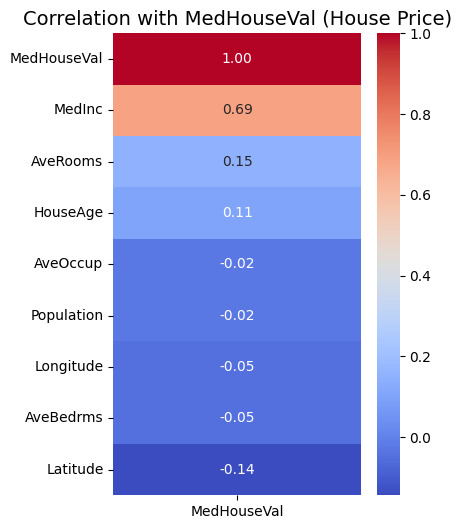

In [ ]:
corr_with_target = housing.corr()[['MedHouseVal']].sort_values(by='MedHouseVal', ascending=False)

plt.figure(figsize=(4,6))
sns.heatmap(corr_with_target, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

plt.title("Correlation with MedHouseVal (House Price)", fontsize=14)
plt.show()

Step 4: Validate Data.

In [ ]:
housing.isna().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


There are no Null Values

In [ ]:
housing.dtypes

,0
MedInc,float64
HouseAge,float64
AveRooms,float64
AveBedrms,float64
Population,float64
AveOccup,float64
Latitude,float64
Longitude,float64
MedHouseVal,float64


All the features are float and there are no categorical feature.

Step 5: Split the dataset for testing and training


In [ ]:
X = housing.iloc[:,:-1]
y = housing.iloc[:,-1]

In [ ]:
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (20640, 8)
y shape: (20640,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Here, we are randomly splitting the data into training and testing set using train_test_split() method. 80% is kept for training and 20% for testing.

Step 6: Fitting the model

In [ ]:
regression_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

For better accuracy, standard scaling is applied. The Pipeline first applies the standardScaler() function to the features and then calls the Linear Regression Model. Using a Pipeline makes the code cleaner, reusable, and reduces a lot of boilerplate code.


In [ ]:
regression_pipeline.fit(X_train,y_train)

regressor = regression_pipeline.named_steps['regressor']

print("\nResults from scikit-learn with Pipeline class")
print("Intercept (b) =", regressor.intercept_)
print("Ko'paytma koeffitsientlar (m) =", regressor.coef_)


Results from scikit-learn with Pipeline class
Intercept (b) = 2.0719469373788777
Ko'paytma koeffitsientlar (m) = [ 0.85438303  0.12254624 -0.29441013  0.33925949 -0.00230772 -0.0408291
 -0.89692888 -0.86984178]


Step 7: Prediction and Evaluation


In [ ]:
y_pred = regression_pipeline.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2_scores = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R2:", r2_scores)

Mean Squared Error (MSE): 0.5558915986952442
Mean Absolute Error (MAE): 0.5332001304956565
R2: 0.575787706032451


I have just demonstrated how to perform basic linear regression using the Scikit-learn library using Pipeline class.

Now, let’s look at different ways below. These are simple linear regression libraries.

Using MinMax scaler and LinearRegression library for multiple x


In [ ]:
housing = fetch_california_housing(as_frame=True)
housing = housing.frame

X = housing[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']].values
y = housing['MedHouseVal'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Min-Max Normalizatsion
scaler_X = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.fit_transform(X_test)

In [ ]:
# Regression using scikit-learn
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

print("\nResults from scikit-learn:")
print("Intercept (b) =", lin_reg.intercept_)
print("Ko'paytma koeffitsientlar (m) =", lin_reg.coef_)

# Prediction using the scikit-learn model
y_pred = lin_reg.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2_scores = r2_score(y_test, y_pred)

print("R2:", r2_scores)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)


Results from scikit-learn:
Intercept (b) = [3.62707175]
Ko'paytma koeffitsientlar (m) = [[  6.50587593   0.49593713 -17.39108272  19.81593931  -0.07241483
   -4.38194802  -3.94604937  -4.35442897]]
R2: 0.45449247618216737
Mean Squared Error (MSE): 0.7148379569088492
Mean Absolute Error (MAE): 0.5854232079261826


Results from scikit-learn with Pipeline class <br>

0.575787706032451 <br>
Mean Squared Error (MSE): 0.5558915986952442 <br>
Mean Absolute Error (MAE): 0.5332001304956565 <br>

Intercept (b) = [0.39627815] <br>

Multiplication coefficients → Regression coefficients: <br>
(m) = [[ 0.17616072  0.02526716 -0.06070287  0.06995012 -0.00047582 -0.00841834
  -0.18493303 -0.17934808]]

Linear regression with only one x - feature

In [ ]:
housing = fetch_california_housing(as_frame=True)
housing = housing.frame

X = housing[['MedInc']].values
y = housing['MedHouseVal'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Min-Max Normalization
scaler_X = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.fit_transform(X_test)


In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

print("\n Results from scikit-learn:")
print("Intercept (b) =", lin_reg.intercept_[0])
print("Slope (m) =", lin_reg.coef_[0][0])

Y_sk_pred = lin_reg.predict(X)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2_scores = r2_score(y_test, y_pred)

print("R2:", r2_scores)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)




 Results from scikit-learn:
Intercept (b) = 0.45085576703267893
Slope (m) = 0.41793849201896277
R2: 0.45449247618216737
Mean Squared Error (MSE): 0.7148379569088492
Mean Absolute Error (MAE): 0.5854232079261826


Results from scikit-learn with Pipeline class <br>

0.575787706032451 <br>
Mean Squared Error (MSE): 0.5558915986952442 <br>
Mean Absolute Error (MAE): 0.5332001304956565 <br>

Intercept (b) = [0.39627815] <br>

Multiplication coefficients → Regression coefficients: <br>
(m) = [[ 0.17616072  0.02526716 -0.06070287  0.06995012 -0.00047582 -0.00841834
  -0.18493303 -0.17934808]]

Results from scikit-learn with multipe features <br>

Intercept (b) = [3.62707175] <br>
Multiplication coefficients → Regression coefficients = [[  6.50587593   0.49593713 -17.39108272  19.81593931  -0.07241483
   -4.38194802  -3.94604937  -4.35442897]]
   <br>

R2: 0.45449247618216737<br>
Mean Squared Error (MSE): 0.7148379569088492<br>
Mean Absolute Error (MAE): 0.5854232079261826<br>

# Manual way to implement one feature linear regression

In [ ]:
housing = fetch_california_housing(as_frame=True)
housing = housing.frame

X = housing[['MedInc']].values
y = housing['MedHouseVal'].values.reshape(-1, 1)



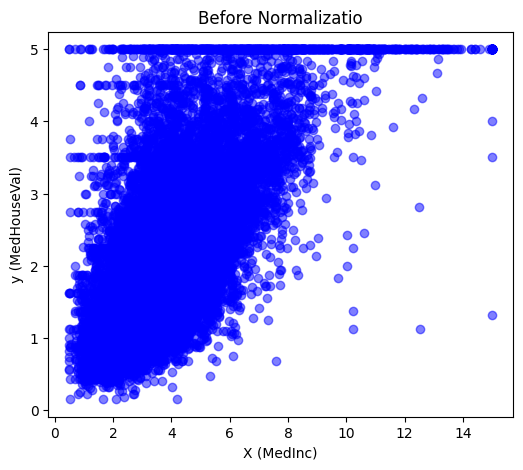

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
plt.scatter(X, y, color='blue', alpha=0.5)
plt.title("Before Normalizatio")
plt.xlabel("X (MedInc)")
plt.ylabel("y (MedHouseVal)")
plt.show()

## 📌 Standardization (Min-Max Normalization)
📊 There is a difference between the `MedInc` and `MedHouseVal` columns.

🛠Therefore, we use the **Min-Max Normalization** method:

$$
X_{\text{new}} = \frac{X - X_{\min}}{X_{\max} - X_{\min}}
$$

**where:**

- $ X_{\min} $ – minimum value  
- $ X_{\max} $ – maximum value

🎯 This helps our **Gradient Descent** model train faster!


In [ ]:
X_min, X_max = np.min(X), np.max(X)
X = (X - X_min) / (X_max - X_min)  # Scaling to [0,1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Y_min, Y_max = np.min(Y), np.max(Y)
# Y = (Y - Y_min) / (Y_max - Y_min)  # Scaling to [0,1]

print("X shape:", X.shape)
print("Y shape:", y.shape)

X shape: (20640, 1)
Y shape: (20640, 1)


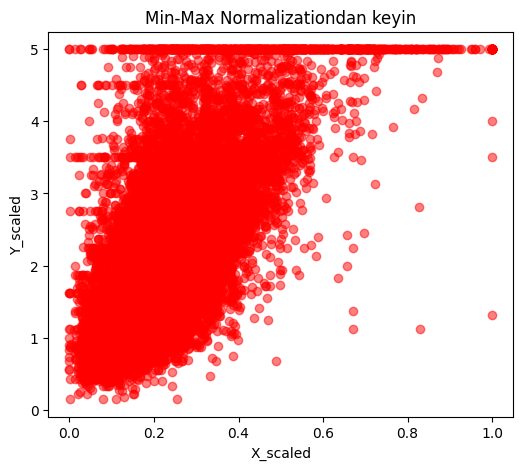

In [ ]:
plt.figure(figsize=(6, 5))
plt.scatter(X, y, color='red', alpha=0.5)
plt.title("Min-Max Normalizationdan keyin")
plt.xlabel("X_scaled")
plt.ylabel("Y_scaled")
plt.show()

# 4️⃣ Calculating b and m using Gradient Descent
📉 **Gradient Descent (GD)** – s an iterative method that determines the values of **b* and **m** by **minimizing the error**.

🎯 **Our cost function** (Cost function) (MSE – Mean Squared Error):

$$
J(b, m) = \frac{1}{2N} \sum_{i=1}^{N} (\hat{Y}_i - Y_i)^2
$$

where:
- $ \hat{Y}_i = b + mX_i $ – the prediction of our model.

---

🛠 **Calculating Gradient** and **updating** \( b \), \( m \) **in each iteration:**

$$
b := b - \alpha \frac{1}{N} \sum_{i=1}^{N} (\hat{Y}_i - Y_i)
$$

$$
m := m - \alpha \frac{1}{N} \sum_{i=1}^{N} (\hat{Y}_i - Y_i) X_i
$$

🚀 **We print the error every 100 iterations!**


In [ ]:
# Assign initial values to parameters
b = 0.5   # Initial intercept
m_ = 0.5  # Initial slope

# Learning rate
alpha = 0.01

# Number of iterations
num_iterations = 10000

N = len(X_train)  # number of samples
# X_train, X_test, y_train, y_tes
for i in range(num_iterations):
    y_fit = b + m_ * X_train  # Prediction
    error = y_fit - y_train  # Error
    db = (1/N) * np.sum(error)  # ∂J/∂b
    dm = (1/N) * np.sum(error * X_train)  # ∂J/∂m
    b = b - alpha * db
    m_ = m_ - alpha * dm

    if i % 100 == 0:
        cost = (1/(2*N)) * np.sum(error**2)
        print(f"Iteration {i}: cost={cost:.2f}, b={b:.2f}, m={m_:.4f}")

Iteration 0: cost=0.04, b=0.50, m=0.4996
Iteration 100: cost=0.02, b=0.36, m=0.4811
Iteration 200: cost=0.02, b=0.31, m=0.4829
Iteration 300: cost=0.02, b=0.29, m=0.4917
Iteration 400: cost=0.02, b=0.29, m=0.5028
Iteration 500: cost=0.02, b=0.28, m=0.5145
Iteration 600: cost=0.02, b=0.28, m=0.5264
Iteration 700: cost=0.02, b=0.27, m=0.5381
Iteration 800: cost=0.02, b=0.27, m=0.5497
Iteration 900: cost=0.02, b=0.27, m=0.5611
Iteration 1000: cost=0.02, b=0.27, m=0.5723
Iteration 1100: cost=0.02, b=0.26, m=0.5834
Iteration 1200: cost=0.02, b=0.26, m=0.5942
Iteration 1300: cost=0.02, b=0.26, m=0.6049
Iteration 1400: cost=0.02, b=0.26, m=0.6155
Iteration 1500: cost=0.02, b=0.25, m=0.6258
Iteration 1600: cost=0.02, b=0.25, m=0.6360
Iteration 1700: cost=0.02, b=0.25, m=0.6460
Iteration 1800: cost=0.02, b=0.25, m=0.6558
Iteration 1900: cost=0.02, b=0.24, m=0.6655
Iteration 2000: cost=0.02, b=0.24, m=0.6751
Iteration 2100: cost=0.02, b=0.24, m=0.6845
Iteration 2200: cost=0.02, b=0.24, m=0.6937


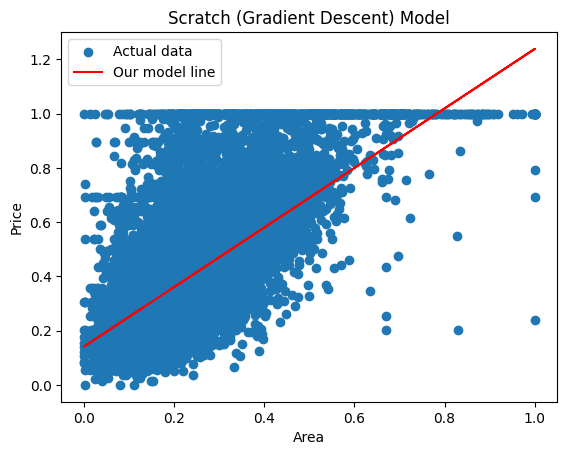

Final parameters (Scratch-GD):
b (intercept) = 0.14106969379601264
m (slope) = 1.0971683965237466
R2: 0.4695500726157613
Mean Squared Error (MSE): 0.030145097553897368
Mean Absolute Error (MAE): 0.13133156135852572


In [ ]:
# Result of our Scratch model
y_fit = b + m_ * X_train

plt.scatter(X_train, y_train, label='Actual data')
plt.plot(X_train, y_fit, label='Our model line', color='red')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Scratch (Gradient Descent) Model')
plt.legend()
plt.show()

print("Final parameters (Scratch-GD):")
print("b (intercept) =", b)
print("m (slope) =", m_)

mse = mean_squared_error(y_train, y_fit)
mae = mean_absolute_error(y_train, y_fit)
r2_scores = r2_score(y_train, y_fit)

print("R2:", r2_scores)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

One feature from library <br>

Results from scikit-learn: <br>
Intercept (b) = 0.45085576703267893 <br>
Slope (m) = 0.41793849201896277 <br>

(4128, 1)
(4128, 1)


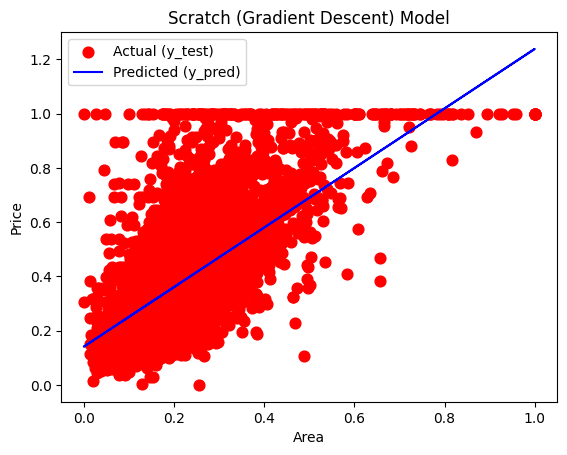

Future prediction: Area = [[0.08146784]
 [0.14009462]
 [0.2055282 ]
 ...
 [0.60205376]
 [0.15759093]
 [0.21049365]] -> Price = [[0.23045364]
 [0.29477708]
 [0.36656874]
 ...
 [0.80162406]
 [0.31397348]
 [0.37201667]]


In [ ]:
# 5️⃣ Predicting for a new point
# X_train, X_test, y_train, y_test
y_pred = b + m_ * X_test  # Predicted price

# Grafik
plt.scatter(X_test, y_test, color='red', s=60, label='Actual (y_test)')       # haqiqiy nuqtalar
# plt.scatter(X_test, y_pred, color='pink', marker='x', s=60, label='Predicted (y_pred)')  # bashorat qilingan nuqtalar - Bunday qilsa, basharot uchun plot emas scatter nuqta qilib beradi.
# plt.plot(X_train, y_fit, color='blue', label='Model line')  # regression chizig'i # Bunday qilsa, train data uchun chizadi.
plt.plot(X_test, y_pred, color='blue', label='Predicted (y_pred)')

print(X_test.shape)
print(y_pred.shape)

plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Scratch (Gradient Descent) Model')
plt.legend()
plt.show()

print("Future prediction: Area =", X_test, "-> Price =", y_pred)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2_scores = r2_score(y_test, y_pred)

print("R2:", r2_scores)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

R2: 0.4534724368423675
Mean Squared Error (MSE): 0.030446114106050255
Mean Absolute Error (MAE): 0.13199907814129605


One feature from library <br>

R2: 0.45449247618216737 <br>
Mean Squared Error (MSE): 0.7148379569088492 <br>
Mean Absolute Error (MAE): 0.5854232079261826 <br>